In [3]:
cd /mnt/data/genomes/mm10/gencode/m17

/mnt/data/genomes/mm10/gencode/m17
/mnt/data/genomes/mm10/gencode/m17
/mnt/data/genomes/mm10/gencode/m17


In [21]:
ls

gencode.vM17.transcripts.fa.Bb6D7f40
gencode.vM17.transcripts.fa.gz
gencode.vM17.transcripts.fa.kallisto.AbfcaAae


In [8]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
cd genomes/mm10/gencode/m17/

/mnt/data/genomes/mm10/gencode/m17/genomes/mm10/gencode/m17


In [22]:
pwd

'/mnt/data/genomes/mm10/gencode/m17'

In [35]:
ksizes = ','.join(map(str, range(3, 61, 3)))
ksizes

'3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60'

In [27]:
! sourmash compute --help

usage: sourmash [-h] [--protein] [--no-protein] [--dna] [--no-dna] [-q]
                [--input-is-protein] [-k KSIZES] [-n NUM_HASHES]
                [--check-sequence] [-f] [-o OUTPUT] [--singleton]
                [--merge MERGED] [--name-from-first] [--track-abundance]
                [--scaled SCALED] [--seed SEED] [--randomize]
                [--license LICENSE]
                filenames [filenames ...]

positional arguments:
  filenames             file(s) of sequences

optional arguments:
  -h, --help            show this help message and exit
  --protein             build protein signatures (default: False)
  --no-protein          do not build protein signatures
  --dna                 build DNA signatures (default: True)
  --no-dna              do not build DNA signatures
  -q, --quiet           suppress non-error output
  --input-is-protein    Consume protein sequences - no translation needed.
  -k KSIZES, --ksizes KSIZES
                        comma-separated list of k-

In [73]:
%%bash

sourmash compute --ksizes 21,33,51 \
    --singleton \
    --protein \
    --scaled 1000 \
    -o gencode.vM17.transcripts.scale1000.fromgz.sig \
    gencode.vM17.transcripts.fa.gz

Process is interrupted.


In [ ]:
%%bash

sourmash compute --ksizes 15,18,21,24,27,30,33 \
    --singleton \
    --protein \
    --scaled 1000 \
    -o gencode.vM17.transcripts.scale1000.k15-33.sig \
    gencode.vM17.transcripts.fa.gz

In [ ]:
ksizes_transcripts = range(15, 34, 3)
molecules = 'protein', 'dna'

for ksize in ksizes_transcripts:
    for molecule in molecules:
        csv = f'gencode.vM17.transcripts.scale1000.k{ksize}.{molecule}.csv'
        command = f'sourmash compare --ksize {ksize} --csv {csv} --{molecule} gencode.vM17.transcripts.scale1000.k15-33.sig'
        ! $command

In [74]:
%%bash

sourmash compute --ksizes 21,33,51 \
    --singleton \
    --protein \
    --scaled 1000 \
    -o gencode.vM17.transcripts.scale1000.fromfa.sig \
    gencode.vM17.transcripts.fa

Process is interrupted.


### Remove adapters

In [ ]:
%%bash
AdapterRemoval \
    --file1 A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz \
    --file2 A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz \
    --identify-adapters > A1-D041914-3_8_M-1-1_S269.adapterremoval.txt 2&>1

In [91]:

%%bash

AdapterRemoval \
    --file1 A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz \
    --file2 A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz \
    --basename A1-D041914-3_8_M-1-1_S269 \
    --gzip \
    --threads 16 \
    --minlength 80 \
    --adapter1 CTGTCTCTTATACACATCTCCGAGCCCACGAGA \
    --adapter2 CTGTCTCTTATACACATCTCCGAGCCCACGAGA

Trimming paired end reads ...
Opening FASTQ file 'A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz'
Opening FASTQ file 'A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz'
Processed a total of 1,342,606 reads in 17.5s; 76,000 reads per second on average ...


In [94]:
len('CTGTCTCTTATACACATCTCCGAGCCCACGAGA')

33

In [92]:
ls -lha

total 30G
drwxrwxr-x 5 ubuntu ubuntu  4.0K Aug  3 23:49 ./
drwxrwxr-x 3 ubuntu ubuntu  4.0K Aug  2 21:06 ../
-rw-rw-r-- 1 ubuntu ubuntu   554 Aug  3 23:43 1
-rw-rw-r-- 1 ubuntu ubuntu  542K Aug  3 02:36 A1-D041914-3_8_M-1-1.gencode.vM17.csv
-rw-rw-r-- 1 ubuntu ubuntu  1.4K Aug  3 23:43 A1-D041914-3_8_M-1-1_S269.adapterremoval.txt
-rw-rw-r-- 1 ubuntu ubuntu  767K Aug  3 23:49 A1-D041914-3_8_M-1-1_S269.discarded.gz
-rw-rw-r-- 1 ubuntu ubuntu  3.8G Aug  3 19:05 A1-D041914-3_8_M-1-1_S269.k12.cg
-rw-rw-r-- 1 ubuntu ubuntu   193 Aug  3 19:06 A1-D041914-3_8_M-1-1_S269.k12.cg.info
-rw-rw-r-- 1 ubuntu ubuntu  3.8G Aug  3 19:07 A1-D041914-3_8_M-1-1_S269.k15.cg
-rw-rw-r-- 1 ubuntu ubuntu   193 Aug  3 19:07 A1-D041914-3_8_M-1-1_S269.k15.cg.info
-rw-rw-r-- 1 ubuntu ubuntu  3.8G Aug  3 19:08 A1-D041914-3_8_M-1-1_S269.k18.cg
-rw-rw-r-- 1 ubuntu ubuntu   193 Aug  3 19:09 A1-D041914-3_8_M-1-1_S269.k18.cg.info
-rw-rw-r-- 1 ubuntu ubuntu  3.8G Aug  3 19:09 A1-D041914-3_8_M-1-1_S269.k21.cg
-rw-rw-r-- 1 ub

In [93]:
cat A1-D041914-3_8_M-1-1_S269.settings

AdapterRemoval ver. 2.2.2
Trimming of paired-end reads


[Adapter sequences]
Adapter1[1]: CTGTCTCTTATACACATCTCCGAGCCCACGAGA
Adapter2[1]: CTGTCTCTTATACACATCTCCGAGCCCACGAGA


[Adapter trimming]
RNG seed: NA
Alignment shift value: 2
Global mismatch threshold: 0.333333
Quality format (input): Phred+33
Quality score max (input): 41
Quality format (output): Phred+33
Quality score max (output): 41
Mate-number separator (input): '/'
Trimming Ns: No
Trimming Phred scores <= 2: No
Trimming using sliding windows: No
Minimum genomic length: 80
Maximum genomic length: 4294967295
Collapse overlapping reads: No
Minimum overlap (in case of collapse): 11


[Trimming statistics]
Total number of read pairs: 671303
Number of unaligned read pairs: 448575
Number of well aligned read pairs: 222728
Number of discarded mate 1 reads: 15529
Number of singleton mate 1 reads: 0
Number of discarded mate 2 reads: 15529
Number of singleton mate 2 reads: 0
Number of reads with adapters[1]: 50548
Number of retained rea

In [88]:
cat A1-D041914-3_8_M-1-1_S269.adapterremoval.txt

Attempting to identify adapter sequences ...
   Found 206735 overlapping pairs ...
   Of which 21859 contained adapter sequence(s) ...

Printing adapter sequences, including poly-A tails:
  --adapter1:  AGATCGGAAGAGCACACGTCTGAACTCCAGTCACNNNNNNATCTCGTATGCCGTCTTCTGCTTG
                  ||       ||||  || || | |  |  ||******   ||   |      |  |     
   Consensus:  CTGTCTCTTATACACATCTCCGAGCCCACGAGACGACGAATGATCTCGTATGCCGTCTTCTGCTTGAAAAGGGGGGGGGGGGGGGGGGC
     Quality:  **+*))(*++(+(+(+&&&**(+(++**)(*&*)'*('*)(&)'&$&(('('(((&%&&%%&%$$$$###"#""#"""""""##"""#"

    Top 5 most common 9-bp 5'-kmers:
            1: CTGTCTCTT = 72.42% (13227)
            2: CTGTCTATT =  1.86% (340)
            3: CTGTATCTT =  1.02% (187)
            4: CTGTCACTT =  0.91% (166)
            5: CTGTATATT =  0.85% (156)


  --adapter2:  AGATCGGAAGAGCGTCGTGTAGGGAAAGAGTGTAGATCTCGGTGGTCGCCGTATCATT
                  ||       |       | |        |         |||     |        
   Consensus:  CTGTCTCTTATACACATCTGACGCTGCCGACGACTCA

In [60]:
ls -lha

total 3.0G
drwxrwxr-x 3 ubuntu ubuntu 4.0K Aug  2 22:22 ./
drwxrwxr-x 3 ubuntu ubuntu 4.0K Aug  2 21:06 ../
-rw-rw-r-- 1 ubuntu ubuntu  34M Oct 31  2017 A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu  36M Oct 31  2017 A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu 2.9M Aug  2 07:51 A1-D041914-3_8_M-1-1.sig
-rw-rw-r-- 1 ubuntu ubuntu 239M May 10 01:08 gencode.vM17.transcripts.fa
-rw-rw-r-- 1 ubuntu ubuntu  53M Apr 25 21:13 gencode.vM17.transcripts.fa.gz
-rw-rw-r-- 1 ubuntu ubuntu 2.4G May 10 01:08 gencode.vM17.transcripts.fa.kallisto
-rw-rw-r-- 1 ubuntu ubuntu  33M Aug  2 22:14 gencode.vM17.transcripts.scale1000.k21.dna.sbt.sbt.json
-rw-rw-r-- 1 ubuntu ubuntu 174M Aug  2 22:34 gencode.vM17.transcripts.scale1000.sig
-rw-rw-r-- 1 ubuntu ubuntu    0 Aug  2 21:14 gencode.vM17.transcripts.scale500.sig
drwxrwxr-x 2 ubuntu ubuntu 8.0M Aug  2 22:14 .sbt.gencode.vM17.transcripts.scale1000.k21.dna.sbt/


In [61]:
! sourmash index --help

usage: sourmash [-h] [-q] [-k KSIZE] [-d N_CHILDREN] [--traverse-directory]
                [--append] [-x BF_SIZE] [-f] [-s SPARSENESS] [--protein]
                [--no-protein] [--dna] [--no-dna]
                sbt_name signatures [signatures ...]

positional arguments:
  sbt_name              name to save SBT into
  signatures            signatures to load into SBT

optional arguments:
  -h, --help            show this help message and exit
  -q, --quiet           suppress non-error output
  -k KSIZE, --ksize KSIZE
                        k-mer size for which to build the SBT.
  -d N_CHILDREN, --n_children N_CHILDREN
                        Number of children for internal nodes
  --traverse-directory  load all signatures underneath this directory.
  --append              add signatures to an existing SBT.
  -x BF_SIZE, --bf-size BF_SIZE
                        Bloom filter size used for internal nodes.
  -f, --force           Try loading all files with --traverse-directory
  -s SP

In [62]:
%%bash

sourmash index --dna --ksize=21 \
    gencode.vM17.transcripts.scale1000.k21.dna.sbt gencode.vM17.transcripts.scale1000.sig

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
ls -lha

total 3.2G
drwxrwxr-x 3 ubuntu ubuntu 4.0K Aug  3 01:05 ./
drwxrwxr-x 3 ubuntu ubuntu 4.0K Aug  2 21:06 ../
-rw-rw-r-- 1 ubuntu ubuntu 542K Aug  3 02:36 A1-D041914-3_8_M-1-1.gencode.vM17.csv
-rw-rw-r-- 1 ubuntu ubuntu  34M Oct 31  2017 A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu  36M Oct 31  2017 A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu 2.9M Aug  2 07:51 A1-D041914-3_8_M-1-1.sig
-rw-rw-r-- 1 ubuntu ubuntu 239M May 10 01:08 gencode.vM17.transcripts.fa
-rw-rw-r-- 1 ubuntu ubuntu  53M Apr 25 21:13 gencode.vM17.transcripts.fa.gz
-rw-rw-r-- 1 ubuntu ubuntu 2.4G May 10 01:08 gencode.vM17.transcripts.fa.kallisto
-rw-rw-r-- 1 ubuntu ubuntu 1.3M Aug  3 00:24 gencode.vM17.transcripts.k12.dist
-rw-rw-r-- 1 ubuntu ubuntu 1.5M Aug  3 00:25 gencode.vM17.transcripts.k15.dist
-rw-rw-r-- 1 ubuntu ubuntu 1.2M Aug  3 00:26 gencode.vM17.transcripts.k18.dist
-rw-rw-r-- 1 ubuntu ubuntu 999K Aug  3 00:27 gencode.vM17.transcripts.k21.dist
-rw-rw-r-- 1 ubunt

In [36]:
%%bash

sourmash index --protein --ksize=21 \
    gencode.vM17.transcripts.scale1000.k21.protein.sbt gencode.vM17.transcripts.scale1000.fromfa.sig

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
! aws s3 cp s3://olgabot-maca/facs/sourmash_dna-only_trim=true_scaled=1000/A1-D041914-3_8_M-1-1.signature A1-D041914-3_8_M-1-1.sig


download: s3://olgabot-maca/facs/sourmash_dna-only_trim=true_scaled=1000/A1-D041914-3_8_M-1-1.signature to ./A1-D041914-3_8_M-1-1.sig
download: s3://olgabot-maca/facs/sourmash_dna-only_trim=true_scaled=1000/A1-D041914-3_8_M-1-1.signature to ./A1-D041914-3_8_M-1-1.sig
download: s3://olgabot-maca/facs/sourmash_dna-only_trim=true_scaled=1000/A1-D041914-3_8_M-1-1.signature to ./A1-D041914-3_8_M-1-1.sig


In [48]:
%%bash

sourmash search --help

usage: sourmash [-h] [--traverse-directory] [-q] [--threshold THRESHOLD]
                [--save-matches SAVE_MATCHES] [--best-only] [-n NUM_RESULTS]
                [--containment] [--scaled SCALED] [-o OUTPUT] [-k KSIZE]
                [--protein] [--no-protein] [--dna] [--no-dna]
                query databases [databases ...]

positional arguments:
  query                 query signature
  databases             signatures/SBTs to search

optional arguments:
  -h, --help            show this help message and exit
  --traverse-directory  search all signatures underneath directories.
  -q, --quiet           suppress non-error output
  --threshold THRESHOLD
                        minimum threshold for reporting matches
  --save-matches SAVE_MATCHES
                        output matching signatures to this file.
  --best-only           report only the best match (with greater speed).
  -n NUM_RESULTS, --num-results NUM_RESULTS
                        number of results to report
  --c

## Download `A1-D041914-3_8_M-1-1` cell's fastqs

In [55]:
! aws s3 cp --recursive --exclude "*" --include "*fastq.gz" s3://czbiohub-maca/remux_data/170907_A00111_0052_AH2HTCDMXX/rawdata/A1-D041914-3_8_M-1-1_S269/ .

download: s3://czbiohub-maca/remux_data/170907_A00111_0052_AH2HTCDMXX/rawdata/A1-D041914-3_8_M-1-1_S269/A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz to ./A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz
download: s3://czbiohub-maca/remux_data/170907_A00111_0052_AH2HTCDMXX/rawdata/A1-D041914-3_8_M-1-1_S269/A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz to ./A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz


In [63]:
%%bash

sourmash compute --ksizes 21,33,51 \
    --singleton \
    --protein \
    --scaled 1000 \
    -o A1-D041914-3_8_M-1-1.singleton.sig \
    A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz

Process is terminated.


## Find kmer distribution in the transcriptome

In [75]:
! load-into-counting.py --help


|| This is the script load-into-counting.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.

usage: load-into-counting.py [--version] [--info] [-h] [-k KSIZE]
                             [-U UNIQUE_KMERS] [--fp-rate FP_RATE]
                             [-M MAX_MEMORY_USAGE] [--small-count]
                             [-T THREADS] [-b] [-s FORMAT] [-f] [-q]
                             output_countgraph_filename
                             input_sequence_filename
                             [input_sequence_filename ...]

Build a k-mer countgraph from the given

In [37]:
ksizes = range(12, 32, 3)


for ksize in ksizes:
    command = f'load-into-counting.py --ksize {ksize} -M 4G --threads 8 A1-D041914-3_8_M-1-1_S269.k{ksize}.cg A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz'
    ! echo $ksize
    ! $command

12

|| This is the script load-into-counting.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     12 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 1e+09 	(-x)
Estimated memory usage is 4.0 Gb (4e+09 bytes = 4 bytes x 1e+09 entries / 1 entries per byte)
--------
Saving k-mer countgraph to A1-D041914-3_8_M-1-1_S269.k12.cg
Loading kmers from sequences in ['A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz', 'A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz']
making countgraph
consuming input A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz
consuming i

consuming input A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz
consuming input A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz
Total number of unique k-mers: 10862654
saving A1-D041914-3_8_M-1-1_S269.k30.cg
fp rate estimated to be 0.000
DONE.
wrote to: A1-D041914-3_8_M-1-1_S269.k30.cg.info


In [38]:
! abundance-dist.py --help


|| This is the script abundance-dist.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.

usage: abundance-dist.py [--version] [--info] [-h] [-z] [-s] [-b] [-f] [-q]
                         input_count_graph_filename input_sequence_filename
                         output_histogram_filename

Calculate abundance distribution of the k-mers in the sequence file using a
pre-made k-mer countgraph.

positional arguments:
  input_count_graph_filename
                        The name of the input k-mer countgraph file.
  input_sequence_filename
                        The name of the input FAST[AQ] sequence file.
  output_histogram_filena

### Get distribution of kmers in untrimmed data

In [40]:
ksizes = range(12, 32, 3)


for ksize in ksizes:
    command_r1 = f'abundance-dist.py A1-D041914-3_8_M-1-1_S269.k{ksize}.cg A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz A1-D041914-3_8_M-1-1_S269_R1_001.k{ksize}.dist'
    command_r2 = f'abundance-dist.py A1-D041914-3_8_M-1-1_S269.k{ksize}.cg A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz A1-D041914-3_8_M-1-1_S269_R2_001.k{ksize}.dist'
    ! echo $ksize
    ! $command_r1
    ! $command_r2

12

|| This is the script abundance-dist.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.

Loading counting graph from A1-D041914-3_8_M-1-1_S269.k12.cg
K: 12
outputting to A1-D041914-3_8_M-1-1_S269_R1_001.k12.dist
preparing hist...

|| This is the script abundance-dist.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||
|| Please see http://khmer.readthed

K: 30
outputting to A1-D041914-3_8_M-1-1_S269_R2_001.k30.dist
preparing hist...


In [65]:
import glob
import pandas as pd
import re

dfs = []

for filename in glob.glob("A1-D041914-3_8_M-1-1_S269*.dist"):
    df = pd.read_csv(filename)
    df['ksize'] = int(filename.split('.')[-2].strip('k'))
    df['read_number'] = re.findall('_(R\d)_', filename)[0]
    dfs.append(df)

cell_kmer_dist = pd.concat(dfs, ignore_index=True)
print(cell_kmer_dist.shape)
cell_kmer_dist.head()

(778936, 7)


,abundance,count,cumulative,cumulative_fraction,ksize,read_number,count_both_reads
0,0,0,0,0.000,15,R2,0.0
1,1,2278888,2278888,0.373,15,R2,34439086.0
2,2,537125,2816013,0.461,15,R2,7146352.0
3,3,308618,3124631,0.511,15,R2,4200020.0
4,4,250335,3374966,0.552,15,R2,3415939.0


In [70]:
cell_kmer_dist_both_reads = cell_kmer_dist.groupby(['abundance', 'ksize'])['count'].sum()
cell_kmer_dist_both_reads = cell_kmer_dist_both_reads.reset_index()
cell_kmer_dist_both_reads.head()

,abundance,ksize,count
0,0,12,0
1,0,15,0
2,0,18,0
3,0,21,0
4,0,24,0


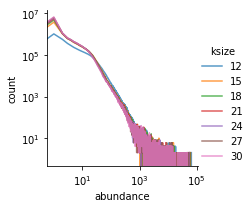

In [71]:
g = sns.FacetGrid(cell_kmer_dist_both_reads, hue='ksize')
g.map(plt.loglog, 'abundance', 'count', alpha=0.75)
g.add_legend()

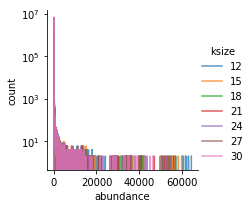

In [73]:
g = sns.FacetGrid(cell_kmer_dist_both_reads, hue='ksize')
g.map(plt.semilogy, 'abundance', 'count', alpha=0.75)
g.add_legend()

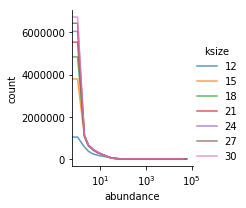

In [74]:
g = sns.FacetGrid(cell_kmer_dist_both_reads, hue='ksize')
g.map(plt.semilogx, 'abundance', 'count', alpha=0.75)
g.add_legend()

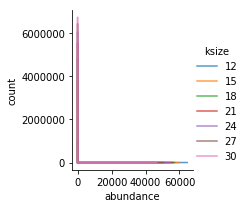

In [75]:
g = sns.FacetGrid(cell_kmer_dist_both_reads, hue='ksize')
g.map(plt.plot, 'abundance', 'count', alpha=0.75)
g.add_legend()

### Get distribution of kmers in **trimmed** data

In [82]:
ksizes = range(12, 35, 3)

x = "asdf"

for ksize in ksizes:
    command = f'abundance-dist-single.py --force --threads 4 -M 4G -k {ksize} A1-D041914-3_8_M-1-1.trimmed A1-D041914-3_8_M-1-1.trimmed.k{ksize}.dist'
    ! echo $command
    ! $command
#     ! echo $ksize $x
#     k = str(ksize)
#     ! echo $ksize

abundance-dist-single.py --force --threads 4 -M 4G -k 12 A1-D041914-3_8_M-1-1.trimmed A1-D041914-3_8_M-1-1.trimmed.k12.dist

|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     12 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 1e+09 	(-x)
Estimated memory usage is 4.0 Gb (4e+09 bytes = 4 bytes x 1e+09 entries / 1 entries per byte)
--------
making countgraph
building k-mer tracking graph
kmer_size: 12
k-mer countgraph sizes: [860214997, 860214959, 860214923, 860214919]
outputting to A

building k-mer tracking graph
kmer_size: 30
k-mer countgraph sizes: [860214997, 860214959, 860214923, 860214919]
outputting to A1-D041914-3_8_M-1-1.trimmed.k30.dist
consuming input, round 1 -- A1-D041914-3_8_M-1-1.trimmed
Total number of unique k-mers: 8621268
preparing hist from A1-D041914-3_8_M-1-1.trimmed...
consuming input, round 2 -- A1-D041914-3_8_M-1-1.trimmed
wrote to: A1-D041914-3_8_M-1-1.trimmed.k30.dist
abundance-dist-single.py --force --threads 4 -M 4G -k 33 A1-D041914-3_8_M-1-1.trimmed A1-D041914-3_8_M-1-1.trimmed.k33.dist

|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see

In [83]:
import glob
import pandas as pd
import re

dfs = []

for filename in glob.glob("A1-D041914-3_8_M-1-1.trimmed.*.dist"):
    df = pd.read_csv(filename)
    df['ksize'] = int(filename.split('.')[-2].strip('k'))
#     df['read_number'] = re.findall('_(R\d)_', filename)[0]
    dfs.append(df)

trimmed_cell_kmer_dist = pd.concat(dfs, ignore_index=True)
print(trimmed_cell_kmer_dist.shape)
trimmed_cell_kmer_dist.head()

(384052, 5)


,abundance,count,cumulative,cumulative_fraction,ksize
0,0,0,0,0.000,27
1,1,4834186,4834186,0.565,27
2,2,571063,5405249,0.631,27
3,3,331995,5737244,0.670,27
4,4,262501,5999745,0.701,27


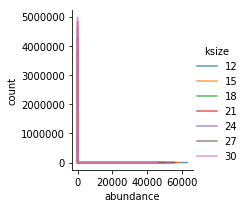

In [84]:
g = sns.FacetGrid(trimmed_cell_kmer_dist, hue='ksize')
g.map(plt.plot, 'abundance', 'count', alpha=0.75)
g.add_legend()

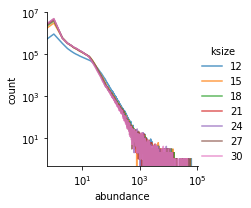

In [85]:
g = sns.FacetGrid(trimmed_cell_kmer_dist, hue='ksize')
g.map(plt.loglog, 'abundance', 'count', alpha=0.75)
g.add_legend()

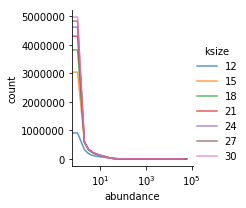

In [86]:
g = sns.FacetGrid(trimmed_cell_kmer_dist, hue='ksize')
g.map(plt.semilogx, 'abundance', 'count', alpha=0.75)
g.add_legend()

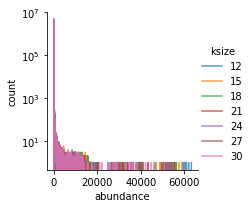

In [87]:
g = sns.FacetGrid(trimmed_cell_kmer_dist, hue='ksize')
g.map(plt.semilogy, 'abundance', 'count', alpha=0.75)
g.add_legend()

In [80]:
! abundance-dist-single.py --help


|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.

usage: abundance-dist-single.py [--version] [--info] [-h] [-k KSIZE]
                                [-U UNIQUE_KMERS] [--fp-rate FP_RATE]
                                [-M MAX_MEMORY_USAGE] [--small-count]
                                [-T THREADS] [-z] [-b] [-s]
                                [--savegraph filename] [-f] [-q]
                                input_sequence_filename
                                output_histogram_filename

Calculate the abundance d

In [82]:
ls -lha

total 3.2G
drwxrwxr-x 3 ubuntu ubuntu 4.0K Aug  3 00:10 ./
drwxrwxr-x 3 ubuntu ubuntu 4.0K Aug  2 21:06 ../
-rw-rw-r-- 1 ubuntu ubuntu  34M Oct 31  2017 A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu  36M Oct 31  2017 A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu    0 Aug  2 22:40 A1-D041914-3_8_M-1-1.sig
-rw-rw-r-- 1 ubuntu ubuntu 239M May 10 01:08 gencode.vM17.transcripts.fa
-rw-rw-r-- 1 ubuntu ubuntu  53M Apr 25 21:13 gencode.vM17.transcripts.fa.gz
-rw-rw-r-- 1 ubuntu ubuntu 2.4G May 10 01:08 gencode.vM17.transcripts.fa.kallisto
-rw-rw-r-- 1 ubuntu ubuntu 911K Aug  3 00:11 gencode.vM17.transcripts.k21.dist
-rw-rw-r-- 1 ubuntu ubuntu 174M Aug  2 23:43 gencode.vM17.transcripts.scale1000.fromfa.sig
-rw-rw-r-- 1 ubuntu ubuntu 174M Aug  2 23:41 gencode.vM17.transcripts.scale1000.fromgz.sig
-rw-rw-r-- 1 ubuntu ubuntu  33M Aug  3 00:07 gencode.vM17.transcripts.scale1000.k21.dna.sbt.sbt.json
-rw-rw-r-- 1 ubuntu ubuntu    0 Aug  2 23:31 gencode.vM

In [81]:
! abundance-dist-single.py --force --threads 4 -M 4G -k 21 gencode.vM17.transcripts.fa gencode.vM17.transcripts.k21.dist


|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     21 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 1e+09 	(-x)
Estimated memory usage is 4.0 Gb (4e+09 bytes = 4 bytes x 1e+09 entries / 1 entries per byte)
--------
ERROR: gencode.vM17.transcripts.k21.dist exists; not squashing.


In [1]:
range(3)

range(0, 3)

In [5]:
rm *dist

## Get distributions of kmers in transcriptome

In [6]:
ksizes = range(12, 35, 3)

x = "asdf"

for ksize in ksizes:
    command = f'abundance-dist-single.py --force --threads 4 -M 4G -k {ksize} gencode.vM17.transcripts.fa gencode.vM17.transcripts.k{ksize}.dist'
    ! echo $command
    ! $command
#     ! echo $ksize $x
#     k = str(ksize)
#     ! echo $ksize

abundance-dist-single.py --force --threads 4 -M 4G -k 12 gencode.vM17.transcripts.fa gencode.vM17.transcripts.k12.dist

|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.readthedocs.io/en/latest/citations.html for details.


PARAMETERS:
 - kmer size =     12 		(-k)
 - n tables =      4 		(-N)
 - max tablesize = 1e+09 	(-x)
Estimated memory usage is 4.0 Gb (4e+09 bytes = 4 bytes x 1e+09 entries / 1 entries per byte)
--------
making countgraph
building k-mer tracking graph
kmer_size: 12
k-mer countgraph sizes: [860214997, 860214959, 860214923, 860214919]
outputting to gencod

building k-mer tracking graph
kmer_size: 30
k-mer countgraph sizes: [860214997, 860214959, 860214923, 860214919]
outputting to gencode.vM17.transcripts.k30.dist
consuming input, round 1 -- gencode.vM17.transcripts.fa
Total number of unique k-mers: 116175270
preparing hist from gencode.vM17.transcripts.fa...
consuming input, round 2 -- gencode.vM17.transcripts.fa
wrote to: gencode.vM17.transcripts.k30.dist
abundance-dist-single.py --force --threads 4 -M 4G -k 33 gencode.vM17.transcripts.fa gencode.vM17.transcripts.k33.dist

|| This is the script abundance-dist-single.py in khmer.
|| You are running khmer version 3.0.0a1
|| You are also using screed version 1.0
||
|| If you use this script in a publication, please cite EACH of the following:
||
||   * MR Crusoe et al., 2015. http://dx.doi.org/10.12688/f1000research.6924.1
||   * Q Zhang et al., http://dx.doi.org/10.1371/journal.pone.0101271
||   * A. Döring et al. http://dx.doi.org:80/10.1186/1471-2105-9-11
||
|| Please see http://khmer.

In [ ]:
ksizes = range(12, 35, 3)

x = "asdf"

for ksize in ksizes:
    command = f'abundance-dist-single.py --force --threads 4 -M 4G -k {ksize} gencode.vM17.transcripts.fa gencode.vM17.transcripts.k{ksize}.dist'
    ! echo $command
    ! $command
#     ! echo $ksize $x
#     k = str(ksize)
#     ! echo $ksize

In [7]:
ls 

A1-D041914-3_8_M-1-1_S269_R1_001.fastq.gz
A1-D041914-3_8_M-1-1_S269_R2_001.fastq.gz
A1-D041914-3_8_M-1-1.sig
gencode.vM17.transcripts.fa
gencode.vM17.transcripts.fa.gz
gencode.vM17.transcripts.fa.kallisto
gencode.vM17.transcripts.k12.dist
gencode.vM17.transcripts.k15.dist
gencode.vM17.transcripts.k18.dist
gencode.vM17.transcripts.k21.dist
gencode.vM17.transcripts.k24.dist
gencode.vM17.transcripts.k27.dist
gencode.vM17.transcripts.k30.dist
gencode.vM17.transcripts.k33.dist
gencode.vM17.transcripts.scale1000.fromfa.sig
gencode.vM17.transcripts.scale1000.fromgz.sig
gencode.vM17.transcripts.scale1000.k21.dna.sbt.sbt.json
gencode.vM17.transcripts.scale1000.sig
gencode.vM17.transcripts.scale500.sig


In [4]:
import glob
import pandas as pd

dfs = []

for filename in glob.glob("gencode.vM17.transcripts.*.dist"):
    df = pd.read_csv(filename)
    df['ksize'] = int(filename.split('.')[-2].strip('k'))
    dfs.append(df)

distributions = pd.concat(dfs, ignore_index=True)
print(distributions.shape)
distributions.head()

(319019, 5)
(319019, 5)


,abundance,count,cumulative,cumulative_fraction,ksize
0,0,0,0,0.000,12
1,1,361057,361057,0.041,12
2,2,334380,695437,0.079,12
3,3,320771,1016208,0.115,12
4,4,306833,1323041,0.150,12


,abundance,count,cumulative,cumulative_fraction,ksize
0,0,0,0,0.000,12
1,1,361057,361057,0.041,12
2,2,334380,695437,0.079,12
3,3,320771,1016208,0.115,12
4,4,306833,1323041,0.150,12


(319019, 5)


,abundance,count,cumulative,cumulative_fraction,ksize
0,0,0,0,0.000,12
1,1,361057,361057,0.041,12
2,2,334380,695437,0.079,12
3,3,320771,1016208,0.115,12
4,4,306833,1323041,0.150,12


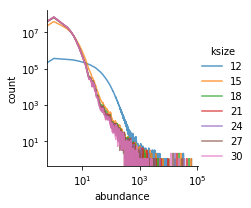

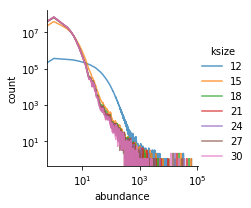

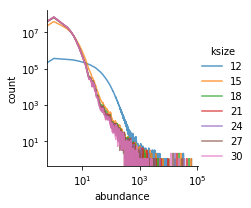

In [20]:
g = sns.FacetGrid(distributions, hue='ksize')
g.map(plt.loglog, 'abundance', 'count', alpha=0.75)
g.add_legend()

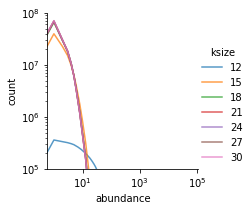

In [28]:
g = sns.FacetGrid(distributions, hue='ksize')
g.map(plt.loglog, 'abundance', 'count', alpha=0.75)
g.add_legend()
g.set(ylim=(1e5, 1e8))

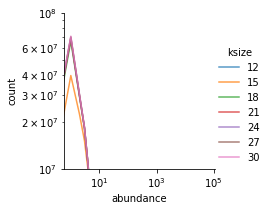

In [29]:
g = sns.FacetGrid(distributions, hue='ksize')
g.map(plt.loglog, 'abundance', 'count', alpha=0.75)
g.add_legend()
g.set(ylim=(1e7, 1e8))

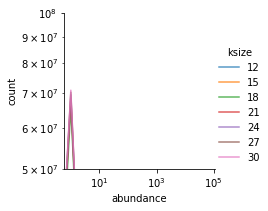

In [30]:
g = sns.FacetGrid(distributions, hue='ksize')
g.map(plt.loglog, 'abundance', 'count', alpha=0.75)
g.add_legend()
g.set(ylim=(5*1e7, 1e8))

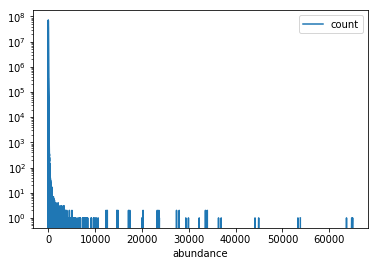

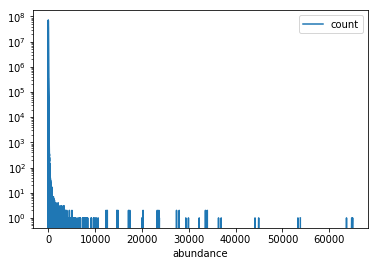

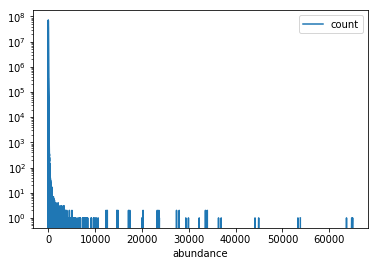

In [12]:
distributions.plot(x='abundance', y='count', logy=True)

In [13]:
# import altair as alt

In [18]:
# alt.data_transformers.enable('default', max_rows=None)
# alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [ ]:

# alt.Chart(distributions).mark_line().encode(
#     x='abundance',
#     y='count',
#     color='ksize'
# )

### Distributions with tooltips

In [ ]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# The basic line
line = alt.Chart().mark_line(interpolate='basis').encode(
    x='abunance:Q',
    y='count:Q',
    color='ksize:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart().mark_point().encode(
    x='x:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'y:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart().mark_rule(color='gray').encode(
    x='x:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(line, selectors, points, rules, text,
          data=data, width=600, height=300)

In [89]:
! head gencode.vM17.transcripts.k21.dist

In [96]:
import numpy as np
import pandas as pd
%matplotlib inline

dist_file = 'gencode.vM17.transcripts.k21.dist'

dist = pd.read_csv(dist_file, index_col=0)
dist.head()

,count,cumulative,cumulative_fraction
abundance,,,
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


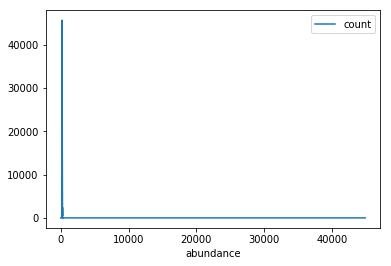

In [98]:
dist.plot(y='count')

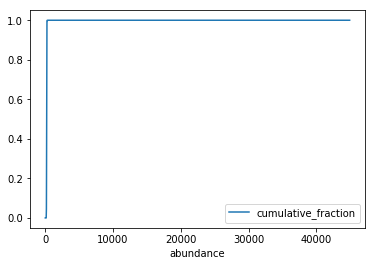

In [97]:
dist.plot(y='cumulative_fraction')

##  Index the transcript signatures

In [ ]:
! abund

In [70]:
%%bash

sourmash index --dna --ksize=21 \
    gencode.vM17.transcripts.scale1000.k21.dna.sbt gencode.vM17.transcripts.scale1000.fromfa.sig

Process is terminated.


In [ ]:
%%bash

sourmash index --protein --scale1000 --ksize=21 \
    gencode.vM17.transcripts.scale1000.k21.dna.sbt gencode.vM17.transcripts.scale1000.fromfa.sig

In [68]:
range(3)

range(0, 3)

##  Search for the cell's reads in the transcriptomes

In [24]:
! sourmash gather --help

usage: sourmash [-h] [--traverse-directory] [-o OUTPUT]
                [--save-matches SAVE_MATCHES] [--threshold-bp THRESHOLD_BP]
                [--output-unassigned OUTPUT_UNASSIGNED] [--scaled SCALED] [-q]
                [--ignore-abundance] [-d] [-k KSIZE] [--protein]
                [--no-protein] [--dna] [--no-dna]
                query databases [databases ...]

positional arguments:
  query                 query signature
  databases             signatures/SBTs to search

optional arguments:
  -h, --help            show this help message and exit
  --traverse-directory  search all signatures underneath directories.
  -o OUTPUT, --output OUTPUT
                        output CSV containing matches to this file
  --save-matches SAVE_MATCHES
                        save the matched signatures from the database to this
                        file.
  --threshold-bp THRESHOLD_BP
                        threshold (in bp) for reporting results
  --output-unassigned OUTPUT_UNASSIGNE

In [27]:
%%bash

sourmash gather --output A1-D041914-3_8_M-1-1.gencode.vM17.csv --threshold-bp 500 --dna --ksize 21 A1-D041914-3_8_M-1-1.sig gencode.vM17.transcripts.scale1000.k21.dna.sbt

Process is interrupted.
Process is interrupted.
Process is interrupted.


In [25]:
%%bash

sourmash search --threshold-bp 500 --dna --ksize 21 A1-D041914-3_8_M-1-1.sig gencode.vM17.transcripts.scale1000.k21.dna.sbt


0 matches:
similarity   match
----------   -----

0 matches:
similarity   match
----------   -----

0 matches:
similarity   match
----------   -----


loaded query: A1-D041914-3_8_M-1-1|tissue:Bl... (k=21, DNA)
loaded 1 databases.                                                            
loaded query: A1-D041914-3_8_M-1-1|tissue:Bl... (k=21, DNA)
loaded 1 databases.                                                            
loaded query: A1-D041914-3_8_M-1-1|tissue:Bl... (k=21, DNA)
loaded 1 databases.                                                            


In [51]:
%%bash

sourmash search --dna --ksize 21 --containment A1-D041914-3_8_M-1-1.sig gencode.vM17.transcripts.scale1000.k21.dna.sbt


0 matches:
similarity   match
----------   -----


loaded query: A1-D041914-3_8_M-1-1|tissue:Bl... (k=21, DNA)
loaded 1 databases.
